<a href="https://colab.research.google.com/github/juha-ylikoski/learned_image_compression/blob/master/compressAI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install compressai

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 319.1/319.1 KB 13.1 MB/s eta 0:00:00


In [2]:
! wget -O orangutan.jpg https://upload.wikimedia.org/wikipedia/commons/b/be/Orang_Utan%2C_Semenggok_Forest_Reserve%2C_Sarawak%2C_Borneo%2C_Malaysia.JPG

--2023-02-14 10:40:21--  https://upload.wikimedia.org/wikipedia/commons/b/be/Orang_Utan%2C_Semenggok_Forest_Reserve%2C_Sarawak%2C_Borneo%2C_Malaysia.JPG
Resolving upload.wikimedia.org (upload.wikimedia.org)... 208.80.154.240, 2620:0:861:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|208.80.154.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1443340 (1.4M) [image/jpeg]
Saving to: ‘orangutan.jpg’

orangutan.jpg       100%[===================>]   1.38M  --.-KB/s    in 0.05s   

2023-02-14 10:40:21 (29.4 MB/s) - ‘orangutan.jpg’ saved [1443340/1443340]



In [3]:
import compressai
import torch
from PIL import Image
import torchvision.transforms as T

In [24]:
2**8

256

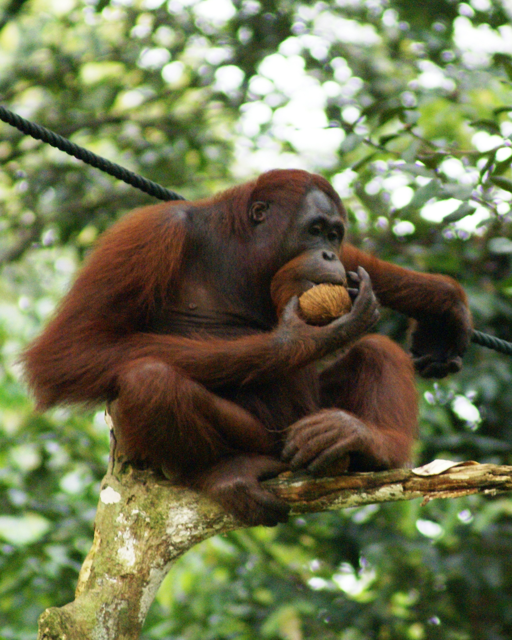

In [4]:
image = Image.open("orangutan.jpg")
image = image.resize((512, 512+128))
display(image)

torch.Size([3, 640, 512])
torch.Size([1, 3, 640, 512])
torch.Size([3, 640, 512])


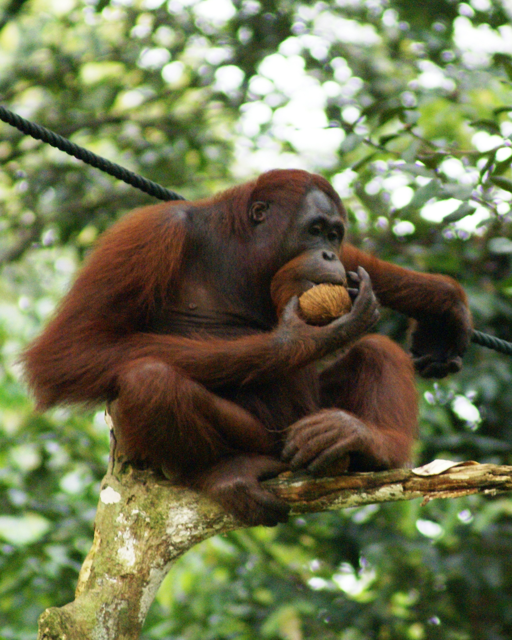

In [5]:
trans = T.ToTensor()
itrans = T.ToPILImage()
tens=trans(image)
print(tens.shape)
tens1=tens.unsqueeze(0).float()
print(tens1.shape)
print(tens1.squeeze(0).shape)
display(itrans(tens1.squeeze(0)))

In [13]:
mbt = compressai.zoo.cheng2020_anchor(5, metric='mse', pretrained=True, progress=True)

Downloading: "https://compressai.s3.amazonaws.com/models/v1/cheng2020-anchor-5-23852949.pth.tar" to /root/.cache/torch/hub/checkpoints/cheng2020-anchor-5-23852949.pth.tar


  0%|          | 0.00/109M [00:00<?, ?B/s]

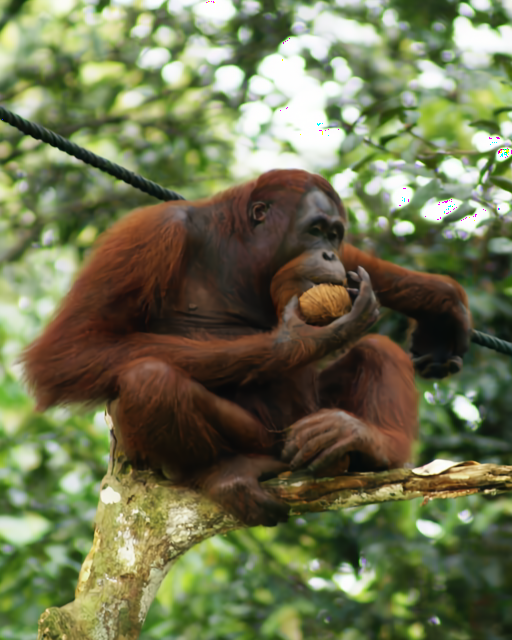

In [14]:
x=mbt(tens1)['x_hat']
i = itrans(x.squeeze(0))
display(i)

In [15]:
r = mbt.compress(tens1)
xhat = mbt.decompress(r['strings'], r['shape'])

In [12]:
r['strings'][0][0]

b'\xeb\xf61\xb9\xaf\xa3\x00\x001Up8\xb5\xdfI\x0c\td\x82\x1d\xa0g\xce\x10B\r\xd6\x98\xf7a\x93C\x8e\x91\x1f\xb9\x1c\xc9\x05nr\xba\xa8i\xae\xd0t\x8eAu\xf8lR4\xa0\xef\x1b\xbf\xb9\xcf\x07\xe4\x0eLM:\xa3\xc3\x04\xd2\x10\xc7\xe0\xf8\xa5BfA\xdb\x7f\x14UxG\xf0+g\xa3h\xca\x8b\xf4\xae\x85\xf6K\xda\xbc\x82\xa7\xe1\x16\xdcdj\xec\xf9\x94 \xb1\xbai\x1e\xd9\\;\xe0X\xe2\x01V\xa1_2\xf2\xe9a\x93t_c\xad,;H\x94\x9d\x12\xcfg*\xa4\xd3?^\xf2!\xbai\xcc\xca\x0c\xdc\x90\x19!\xdf${L\x82\x7f\x94\xe6\xf9\xc2V\xa1\xd4\x9b+g\xdc{\x8b\xeb\xa8\x17JD\xb6\xfa5<\x0ck\xee\x9c\xb5\xba\xb7\x95\x1a\xc0\xe78\xb1\x04UX\xb5\xa4\xfbQH\x9c\xbb\xb7\x89\xec\xcb\xaf\xf2\xe2R\x1f\xf6\x17\x96\xba\x882\x14\xb9@\x08\xa9\x9fKx\x96\xe1x\xbf\x9e\x06\x9e\xcf1\n\xc9\xe4\xf0Hm\xbdd\xc9w\xa0\xdcc\x89\x04\xa2\xc4\xdc\x0fE\x17u\xc4m\xd1GUV\xd3;\xc5\x965q\x18\xa3\x96l,\xf4Vv\x85\xd1\xc9\xe09\xa6\xe6r\x11!\xd8?\x9b \xa1\xf0:\xc2\xf2\x1a\x15T\x0bs\xc4\xbb\x12\n+z\x01#8\x0f\x13\x95\x1eB/\xf0\xe0\x94\xdbM\xf201\xbe46\x16\xfd\xc2=\xa7\x7f)\x9fVyX\x19\x

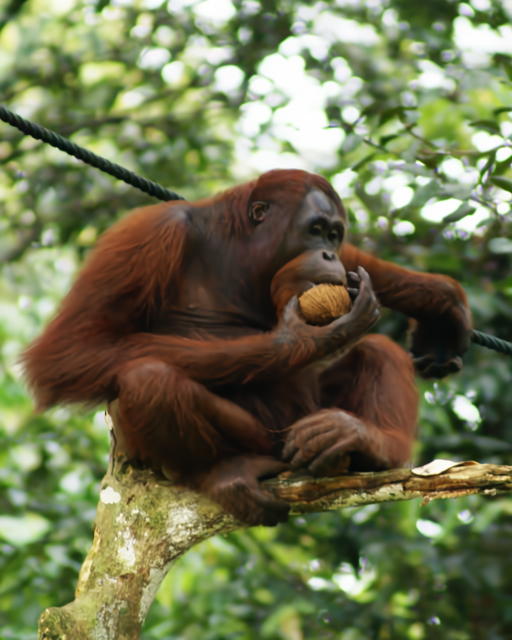

In [16]:
i = itrans(xhat['x_hat'].squeeze(0))
display(i)

In [23]:
# compressai mask conv check
o = torch.ones(1,1,10,10)
_,_,h,w = o.size()
o[:,:,h//2,w//2:] = 0
o[:,:,h//2+1:]=0
o

tensor([[[[1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
          [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
          [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
          [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
          [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
          [1., 1., 1., 1., 1., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]]]])

Channelwise context model tf implementation: https://github.com/Nikolai10/SwinT-ChARM/blob/7ba7bf6779aa4c66d36392c6bfc7878d1b77d4c4/zyc2022.py

Checkerboard spatial context model torch implementation: https://github.com/JiangWeibeta/Checkerboard-Context-Model-for-Efficient-Learned-Image-Compression/blob/main/Cheng2020withCKBD.py

In [ ]:
import torch.nn as nn

from compressai.layers import (
    AttentionBlock,
    ResidualBlock,
    ResidualBlockUpsample,
    ResidualBlockWithStride,
    conv3x3,
    conv1x1,
)
from compressai.losses import RateDistortionLoss
from compressai.entropy_models import (
    GaussianConditional,
    EntropyBottleneck,
)
from compressai.models import JointAutoregressiveHierarchicalPriors

In [ ]:
class ELICModel(JointAutoregressiveHierarchicalPriors):
    """
    Args:
        N (int): Number of channels
      """
    def __init__(self, N=192, **kwargs):
        super().__init__(N=N, M=N, **kwargs)

        self.g_a = nn.Sequential(
            # something like this
            ResidualBlockWithStride(3, N, stride=2),
            ResidualBlock(N, N),
            ResidualBlockWithStride(N, N, stride=2),
            AttentionBlock(N),
            ResidualBlock(N, N),
            ResidualBlockWithStride(N, N, stride=2),
            ResidualBlock(N, N),
            conv3x3(N, N, stride=2),
            AttentionBlock(N),
        )

        self.h_a = nn.Sequential(
            
        )

        self.h_s = nn.Sequential(
            
        )

        self.g_a = nn.Sequential(
            
        )

        self.scctx = SCCTXModel()     

        # inherited
        # self.gaussian_conditional = GaussianConditional(None)
        # self.entropy_bottleneck = EntropyBottleneck(N)
        # self.N = int(N)

    def forward(self, x: torch.Tensor) -> dict:
        """
        executes the full forward pass for training. compress+decompress  
        returns dict with keys 'x_hat' and 'likelihoods'
        'likelihoods' is dict with keys 'y' and 'z'
        """
        y = self.g_a(x)
        z = self.h_a(y)
        z_hat, z_likelihoods = self.entropy_bottleneck(z)
        psi = self.h_s(z_hat)

        yhat = []
        # split y to blocks
        # needs to somehow keep track of y_likelihoods?
        for i,block in enumerate(y_split):
            anchors = anchor_mask*block
            non_anchors = non_anchor_mask*block
            mean, scale = self.sccxt.predict_anchor(yhat, i, psi)
            y_anchor = self.gaussian_conditional(anchors, scale, mean=mean)
            mean_non_anchor, scale_non_anchor = self.sccxt.predict_non_anchor(yhat, i, psi, y_anchor)
            y_non_achor = self.gaussian_conditional(non_anchors, scale_non_anchor, mean=mean_non_anchor)
            block_hat = 0 # combine y_anchor and y_non_anchor
            yhat.append(block_hat)

        x_hat = self.g_s(y_hat)
        return {
            "x_hat": x_hat,
            "likelihoods": {"y": y_likelihoods, "z": z_likelihoods},
        }


    def compress(self, x: torch.Tensor) -> dict:
        """
        returns dict with keys 'strings' and 'shape'
        'strings' is list of compressed y and z
        'shape' is h,w shape of z
        """
        y = self.g_a(x)
        z = self.h_a(y)
        z_hat, z_likelihoods = self.entropy_bottleneck.compress(z)
        # ....

        return {
            "strings": [y_strings, z_strings],
            "shape": z.size()[-2:]
        }

    def decompress(self, strings: list, shape: torch.size) -> dict:
        """
        returns dict with key 'x_hat'
        """
        assert isinstance(strings, list) and len(strings) == 2
        z_hat = self.entropy_bottleneck.decompress(strings[1], shape)
        psi = self.h_s(z_hat)
        # ....

        return {
            "x_hat": x_hat
        }


In [ ]:
class SCCTXModel():
  def __init__(self, M):
      self.block_sizes = [16,16,32,64,M-128]
      self.g_sps = [CheckerboardContext() for _ in range(4)]
      self.g_chs = [ChannelContext() for _ in range(4)]
      
      # lineary reduces the number of channels
      # should this be the same for all blocks? 
      # input and output size depends on block.
      self.param_agg = nn.Sequential(
          conv1x1(4*M[k]+2*M, ),
          nn.ReLU(inplace=True),
          conv1x1(),
          nn.ReLU(inplace=True),
          conv1x1(?,2*M[k])
      )

    def predict_non_anchor(self, 
                           y_hat: torch.Tensor, 
                           block_i: int, 
                           psi: Torch.Tensor, 
                           y_anchor: torch.Tensor) -> tuple:
        """
        returns tuple of tensors mu, sigma paramateres to de/encode the 
        non_anchor parts of block_i

        predict spatial context using psi, g_sps[block_i](y_anchor) and 
        g_ch[<block_i](y_hat) to get theta(chX, sp2)
        """
        sp_cx = g_sps[block_i](y_anchor)
        ch_cx = g_chs[block_i](y_hat)
        cat = torch.cat([sp_cx, ch_cx, psi], dim=1)
        theta = self.param_agg(cat)
        return theta

    def predict_anchor(self, 
                       y_hat: torch.Tensor, 
                       block_i: int, 
                       psi: Torch.Tensor) -> tuple:
      """
      returns tuple of tensors mu, sigma parametres to de/encode the anchors of 
      block_i+1

      get current encoded block of y and calculate theta(chX, sp1) using psi 
      and channel context from g_ch[<block_i](y_hat).
      """
      if i==0:
          ch_cx = torch.zeros(???)
      else:
          ch_cx = g_chs[block_i](y_hat)

      sp_cx = torch.zeros_like(ch_cx) # no spatial context
      cat = torch.cat([sp_cx, ch_cx, psi], dim=1)
      theta = self.param_agg(cat)
      return theta
